# 공통

In [1]:
import sys

import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/code/src')
from helper import df_ann_test, sr_num_frames_test

from pathlib import Path

from tqdm.auto import tqdm, trange

In [115]:
model_name = 'google-siglip-so400m-patch14-384'
p_embedding_text_normal = Path(f'/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/{model_name}/embs_normal.pt')
p_embedding_text_anomaly = Path(f'/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/{model_name}/embs_anomalous.pt')
emb_dict_norm = torch.load(p_embedding_text_normal, weights_only=True)
emb_dict_anom = torch.load(p_embedding_text_anomaly, weights_only=True)
z_txt_norm = emb_dict_norm['embeddings'].numpy()
z_txt_anom = emb_dict_anom['embeddings'].numpy()
z_cat_anom = emb_dict_anom['category_embeddings'].numpy()
caps_norm = np.array(emb_dict_norm['texts'])
caps_anom = np.array(emb_dict_anom['texts'])
caps = np.concatenate((caps_norm, caps_anom), axis=0)
cats_anom = np.array(emb_dict_anom['categories'])

In [ ]:
N = 1000  # number of samples to plot

In [34]:
cats_anom[:20]

['Anomalous',
 'Running into traffic',
 'Earthquake',
 'Hit and run',
 'Poisoning',
 'Bomb threat',
 'Workplace harassment',
 'Climbing fall',
 'Civil disturbance',
 'Horse escape',
 'Equipment malfunction',
 'Counterfeit sales',
 'Fence vandalism',
 'Car Accident',
 'Fire',
 'Jaywalking',
 'Structural Collapse',
 'Power Outage',
 'Cave-in',
 'Stage Collapse']

In [11]:
df_tmp = df_ann_test.join(sr_num_frames_test, on='raw_rel_video_path')
df_tmp['seg_s1'] = df_tmp['s1'] // 16
df_tmp['seg_e1'] = df_tmp['e1'] // 16
df_tmp['seg_s2'] = df_tmp['s2'] // 16
df_tmp['seg_e2'] = df_tmp['e2'] // 16
df_tmp.index = df_tmp['rel_video_path']
display(df_tmp)

,video,label,s1,e1,s2,e2,raw_label,raw_rel_video_path,rel_video_path,num_frames,seg_s1,seg_e1,seg_s2,seg_e2
rel_video_path,,,,,,,,,,,,,,
Abuse/Abuse028_x264.mp4,Abuse028_x264.mp4,Abuse,165,240,-1,-1,Abuse,Abuse/Abuse028_x264.mp4,Abuse/Abuse028_x264.mp4,1412,10,15,-1,-1
Abuse/Abuse030_x264.mp4,Abuse030_x264.mp4,Abuse,1275,1360,-1,-1,Abuse,Abuse/Abuse030_x264.mp4,Abuse/Abuse030_x264.mp4,1544,79,85,-1,-1
Arrest/Arrest001_x264.mp4,Arrest001_x264.mp4,Arrest,1185,1485,-1,-1,Arrest,Arrest/Arrest001_x264.mp4,Arrest/Arrest001_x264.mp4,2374,74,92,-1,-1
Arrest/Arrest007_x264.mp4,Arrest007_x264.mp4,Arrest,1530,2160,-1,-1,Arrest,Arrest/Arrest007_x264.mp4,Arrest/Arrest007_x264.mp4,3144,95,135,-1,-1
Arrest/Arrest024_x264.mp4,Arrest024_x264.mp4,Arrest,1005,3105,-1,-1,Arrest,Arrest/Arrest024_x264.mp4,Arrest/Arrest024_x264.mp4,3629,62,194,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vandalism/Vandalism007_x264.mp4,Vandalism007_x264.mp4,Vandalism,240,750,-1,-1,Vandalism,Vandalism/Vandalism007_x264.mp4,Vandalism/Vandalism007_x264.mp4,1146,15,46,-1,-1
Vandalism/Vandalism015_x264.mp4,Vandalism015_x264.mp4,Vandalism,2010,2700,-1,-1,Vandalism,Vandalism/Vandalism015_x264.mp4,Vandalism/Vandalism015_x264.mp4,2982,125,168,-1,-1
Vandalism/Vandalism017_x264.mp4,Vandalism017_x264.mp4,Vandalism,270,330,780,840,Vandalism,Vandalism/Vandalism017_x264.mp4,Vandalism/Vandalism017_x264.mp4,1011,16,20,48,52


# 텍스트만 찍어보기

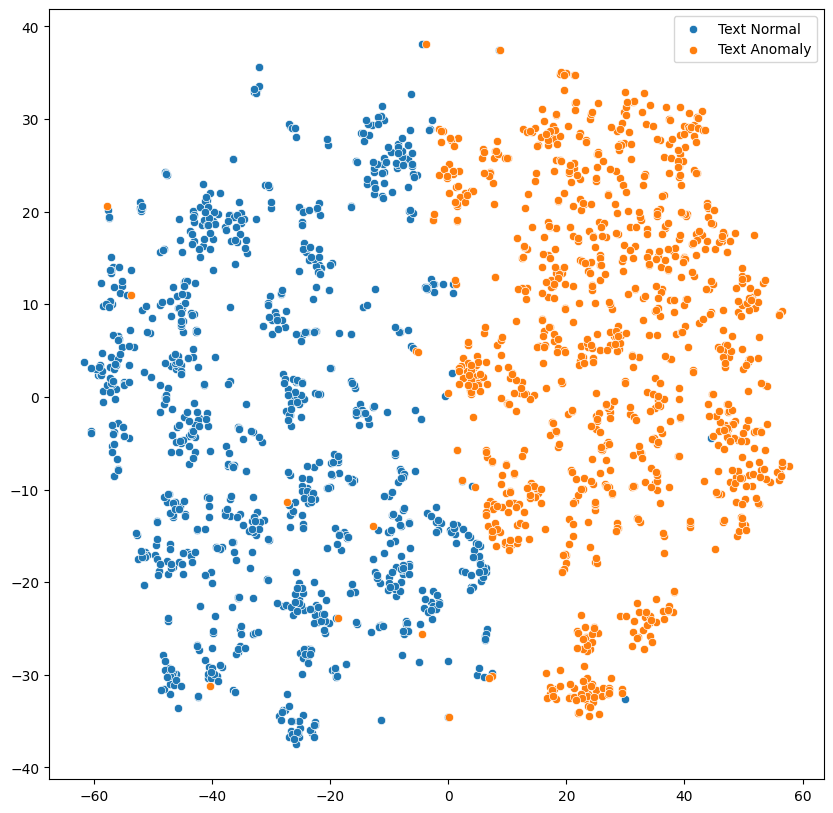

In [12]:
np.random.seed(0)
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init='pca', metric='cosine')
e = np.concatenate([
    z_txt_norm[:N],
    z_txt_anom[:N]], axis=0)
ee = tsne.fit_transform(e)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=ee[:N, 0], y=ee[:N, 1], label='Text Normal')
sns.scatterplot(x=ee[N:, 0], y=ee[N:, 1], label='Text Anomaly')
plt.legend()
plt.show()

# 한번에 다 찍어보기

In [ ]:
# 비디오
# Normal 비디오의 아무 세그먼트
# Anomaly 비디오의 non-anomaly 세그먼트
# Anomaly 비디오의 anomaly 세그먼트

# 텍스트
# normal 텍스트
# anomaly 텍스트

In [6]:
p_embeddings_rootdir = Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/dur=1.0_ol=0.5_fs=16/segments')
embeddings_normal, embeddings_anomaly = [], []
for p_emb in tqdm(sorted(p_embeddings_rootdir.glob('**/*.npy'))):
    rel_video_path = '/'.join(p_emb.parts[-3:-1]) + '.mp4'
    seg_s1, seg_e1, seg_s2, seg_e2 = df_tmp.loc[rel_video_path, ['seg_s1', 'seg_e1', 'seg_s2', 'seg_e2']].values
    seg_id = int(p_emb.stem)
    emb = np.load(p_emb)
    if seg_s1 <= seg_id <= seg_e1 or seg_s2 <= seg_id <= seg_e2:
        embeddings_anomaly.append(emb)
    else:
        embeddings_normal.append(emb)

  0%|          | 0/73696 [00:00<?, ?it/s]

In [7]:
len(embeddings_normal), len(embeddings_anomaly)

(68269, 5427)

In [8]:
embeddings_normal_subsampled = embeddings_normal[::len(embeddings_normal)//1000]
embeddings_anomaly_subsampled = embeddings_anomaly[::len(embeddings_anomaly)//1000]

In [9]:
# emb_normal_mean = embeddings_text_normal.mean(axis=0)
# emb_normal_mean /= np.linalg.norm(emb_normal_mean)
# emb_anomalous_mean = embeddings_text_anomaly.mean(axis=0)
# emb_anomalous_mean /= np.linalg.norm(emb_anomalous_mean)
# emb_proj = emb_anomalous_mean - emb_normal_mean
# emb_proj /= np.linalg.norm(emb_proj)
# emb_proj = emb_proj.astype(np.float32)
# embeddings_normal_subsampled -= np.einsum('i,j,hj->hi', emb_proj, emb_proj, embeddings_normal_subsampled)
# embeddings_anomaly_subsampled -= np.einsum('i,j,hj->hi', emb_proj, emb_proj, embeddings_anomaly_subsampled)

In [10]:
np.random.seed(0)
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init='pca', metric='cosine')
e = np.concatenate([
    embeddings_text_normal,
    embeddings_text_anomaly,
    embeddings_normal_subsampled,
    embeddings_anomaly_subsampled,
], axis=0)
ee = tsne.fit_transform(e)

a, b, c, d = len(embeddings_text_normal), len(embeddings_text_anomaly), len(embeddings_normal_subsampled), len(embeddings_anomaly_subsampled)
bdds = [a, a+b, a+b+c, a+b+c+d]

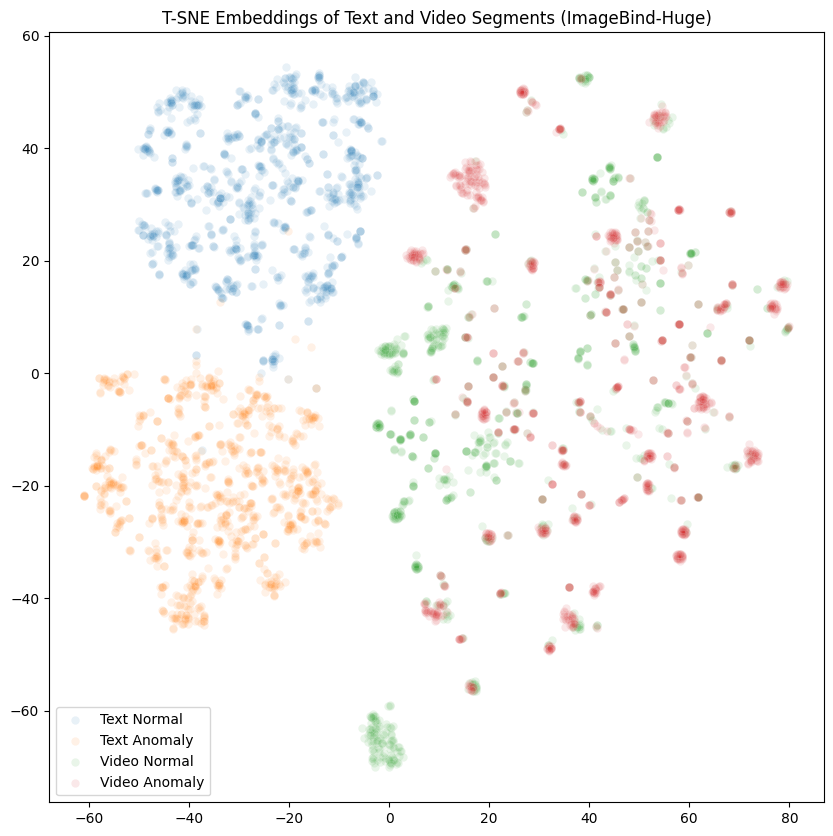

In [11]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=ee[:bdds[0], 0], y=ee[:bdds[0], 1], label='Text Normal', alpha=.1)
sns.scatterplot(x=ee[bdds[0]:bdds[1], 0], y=ee[bdds[0]:bdds[1], 1], label='Text Anomaly', alpha=.1)
sns.scatterplot(x=ee[bdds[1]:bdds[2], 0], y=ee[bdds[1]:bdds[2], 1], label='Video Normal', alpha=.1)
sns.scatterplot(x=ee[bdds[2]:bdds[3], 0], y=ee[bdds[2]:bdds[3], 1], label='Video Anomaly', alpha=.1)
plt.legend()
plt.title('T-SNE Embeddings of Text and Video Segments (ImageBind-Huge)')
plt.show()

# 비디오 단위로 찍어보기 

In [116]:
from collections import defaultdict

p_embeddings_rootdir = Path(f'/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/{model_name}/dur=1.0_ol=0.5_fs=8/segments')
video_embeddings = defaultdict(lambda : {'norm': [], 'anom': []})
for p_emb in tqdm(sorted(p_embeddings_rootdir.glob('**/*.npy'))):
    rel_video_path = '/'.join(p_emb.parts[-3:-1]) + '.mp4'
    seg_s1, seg_e1, seg_s2, seg_e2 = df_tmp.loc[rel_video_path, ['seg_s1', 'seg_e1', 'seg_s2', 'seg_e2']].values
    seg_id = int(p_emb.stem)
    emb = np.load(p_emb)
    if seg_s1 <= seg_id <= seg_e1 or seg_s2 <= seg_id <= seg_e2:
        video_embeddings[rel_video_path]['anom'].append(emb)
    else:
        video_embeddings[rel_video_path]['norm'].append(emb)

video_embeddings = {
    k: {
        'norm': np.array(v['norm']),
        'anom': np.array(v['anom']),
    } for k, v in video_embeddings.items()
}
keys = list(video_embeddings.keys())

  0%|          | 0/73696 [00:00<?, ?it/s]

In [72]:
z_txt_anom_calib = z_txt_anom + z_cat_anom[1:]
z_txt_anom_calib /= np.linalg.norm(z_txt_anom_calib, axis=-1, keepdims=True)

In [81]:
z_txt_norm_from_anom = z_txt_anom - z_cat_anom[1:]
z_txt_norm_from_anom /= np.linalg.norm(z_txt_norm_from_anom, axis=-1, keepdims=True)

In [ ]:
np.random.seed(1)
idx = 31
# z_bg = torch.load((
#     Path('/code/output/psuedo-captions/gpt-4o/00-rich-context/embeddings/imagebind/tmf_frames=64')
#     / df_tmp.loc[keys[idx]]['rel_video_path']).with_suffix('.pt'), weights_only=True
# ).numpy()
z_vid_norm = video_embeddings[keys[idx]]['norm']
z_vid_anom = video_embeddings[keys[idx]]['anom']
embeddings = [
    z_txt_norm[:N],
    z_txt_anom[:N],
    z_vid_norm,
    z_vid_anom,
    # z_cat_anom[:1],
    # z_cat_anom[1:N+1],
    # z_txt_anom_calib[:N],
    # z_txt_norm_from_anom[:N],
    # [z_bg],
]

e = np.concatenate(embeddings, axis=0)

display(df_tmp.loc[keys[idx]])

video                          Burglary092_x264.mp4
label                                      Burglary
s1                                              240
e1                                              420
s2                                               -1
e2                                               -1
raw_label                                  Burglary
raw_rel_video_path    Burglary/Burglary092_x264.mp4
rel_video_path        Burglary/Burglary092_x264.mp4
num_frames                                      625
seg_s1                                           15
seg_e1                                           26
seg_s2                                           -1
seg_e2                                           -1
Name: Burglary/Burglary092_x264.mp4, dtype: object

In [122]:
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init='pca', metric='cosine')
ee = tsne.fit_transform(e)

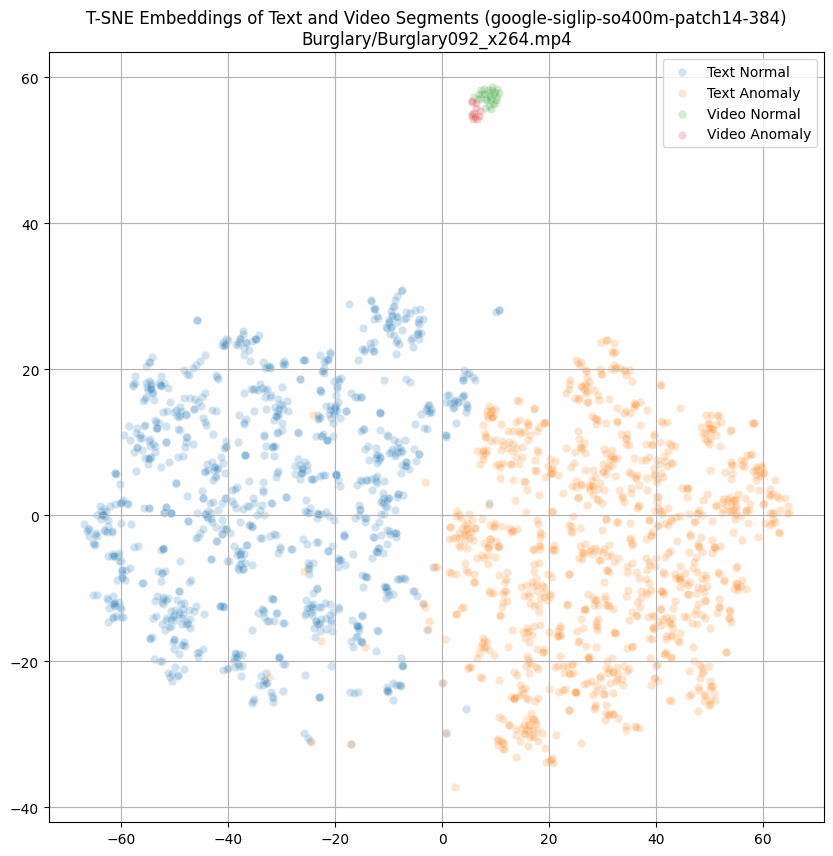

In [123]:
bdds = [len(x) for x in embeddings]
bdds = np.cumsum(bdds)

i = 0
plt.figure(figsize=(10, 10))
# sns.scatterplot(x=ee[-1:, 0], y=ee[-1:, 1], label='Background', color='black', s=1000, marker='*')
sns.scatterplot(x=ee[:bdds[i], 0], y=ee[:bdds[i], 1], label='Text Normal', alpha=.2)
sns.scatterplot(x=ee[bdds[i]:bdds[i+1], 0], y=ee[bdds[i]:bdds[i+1], 1], label='Text Anomaly', alpha=.2)
i += 1; sns.scatterplot(x=ee[bdds[i]:bdds[i+1], 0], y=ee[bdds[i]:bdds[i+1], 1], label='Video Normal', alpha=.2)
i += 1; sns.scatterplot(x=ee[bdds[i]:bdds[i+1], 0], y=ee[bdds[i]:bdds[i+1], 1], label='Video Anomaly', alpha=.2)
# i += 1; sns.scatterplot(x=ee[bdds[i]:bdds[i+1], 0], y=ee[bdds[i]:bdds[i+1], 1], label=f"'{cats_anom[0]}'", alpha=1, color='r', s=100, marker='x')
# i += 1; sns.scatterplot(x=ee[bdds[i]:bdds[i+1], 0], y=ee[bdds[i]:bdds[i+1], 1], label=f"Anomaly Categories", alpha=.2)
# i += 1; sns.scatterplot(x=ee[bdds[i]:bdds[i+1], 0], y=ee[bdds[i]:bdds[i+1], 1], label='Text Anomaly (Calibed)', alpha=.2)
# i += 1; sns.scatterplot(x=ee[bdds[i]:bdds[i+1], 0], y=ee[bdds[i]:bdds[i+1], 1], label='Text Normal (anom - cat)', alpha=.2)
plt.legend()
plt.grid()
plt.title(f'T-SNE Embeddings of Text and Video Segments ({model_name})\n{keys[idx]}')
plt.show()

In [120]:
num_captions_per_segment = 10
# z_txt = np.concatenate([z_txt_norm, z_txt_anom], axis=0)
# z_txt = np.concatenate([z_txt_norm, z_txt_anom_calib], axis=0)
z_txt = np.concatenate([z_txt_norm_from_anom, z_txt_anom_calib], axis=0)
dots_norm = z_vid_norm @ z_txt.T
dots_anom = z_vid_anom @ z_txt.T
args_norm = np.argsort(dots_norm, axis=1)[:, ::-1]
args_anom = np.argsort(dots_anom, axis=1)[:, ::-1]
with np.printoptions(threshold=sys.maxsize, linewidth=sys.maxsize):
    display(args_norm[:, :num_captions_per_segment])
    display(args_anom[:, :num_captions_per_segment])
    print((args_norm[:, :num_captions_per_segment] >= z_txt_norm.shape[0]).mean(axis=1, keepdims=True))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1024 is different from 1152)

In [ ]:
display(np.take(caps, args_norm[:, :num_captions_per_segment], axis=0))
display(np.take(cats_anom[1:], args_norm[:, :num_captions_per_segment] - z_txt_norm.shape[0], axis=0))

array([['[Anomalous]: A vehicle recklessly drives into a dining area, hitting tables and customers.',
        '[Anomalous]: A thief snatches a purse from an outdoor table and runs off.',
        '[Anomalous]: A car jumps the curb and crashes into an outdoor café area.',
        '[Anomalous]: A vehicle accelerates rapidly, colliding with outdoor seating and fleeing.',
        '[Anomalous]: A thief snatches a purse from a chair at the street-side table and flees.',
        '[Anomalous]: A car loses control and crashes into the cafe.',
        '[Anomalous]: A vehicle losing control and crashing into the outdoor seating area.',
        '[Anomalous]: A vehicle crashes into outdoor seating at a café.',
        "[Anomalous]: A driver crashes their vehicle into the café's outdoor seating area.",
        '[Anomalous]: An aggressive dog escapes its yard, attacking pedestrians.'],
       ['[Anomalous]: A thief snatches a purse from an outdoor table and runs off.',
        '[Anomalous]: A vehicle 

array([['Hit and Run', 'Table robbery', 'Café collision', 'Hit and Run',
        'Drive-by Theft', 'Car Crashing into Cafe', 'Hit and run',
        'Vehicle Crash', 'Accident', 'Attack Dog Incident'],
       ['Table robbery', 'Hit and Run', 'Drive-by Theft', 'Hit and Run',
        'Hit and run', 'Outdoor theft', 'Car Crashing into Cafe',
        'Café collision', 'Accident', 'Restaurant Theft'],
       ['Table robbery', 'Hit and Run', 'Drive-by Theft',
        'Outdoor theft', 'Hit and Run', 'Hit and run',
        'Car Crashing into Cafe', 'Café collision', 'Accident',
        'Restaurant Theft'],
       ['Table robbery', 'Drive-by Theft', 'Hit and Run',
        'Outdoor theft', 'Restaurant Theft', 'Hit and run',
        'Car Crashing into Cafe', 'Hit and Run', 'Café collision',
        'Accident'],
       ['Table robbery', 'Drive-by Theft', 'Outdoor theft',
        'Hit and Run', 'Restaurant Theft', 'Hit and Run',
        'Car Crashing into Cafe', 'Coffee Shop Theft', 'Hit and run',
 

(989, 1024)


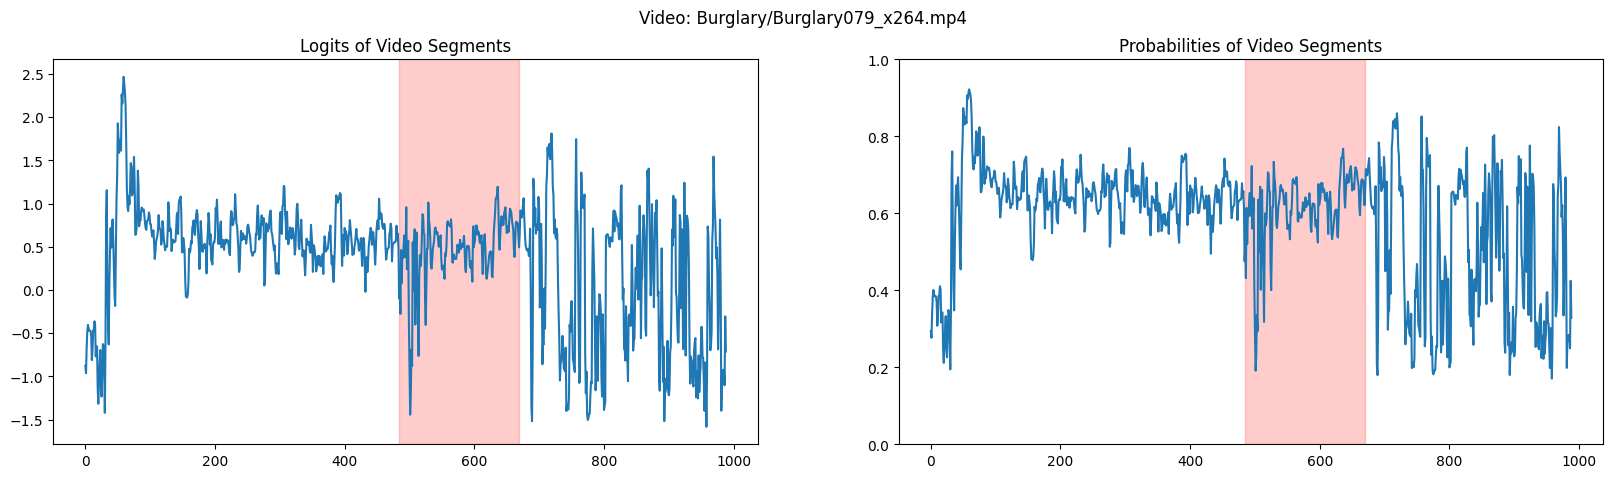

In [ ]:
idx = 30

e_video_normals = video_embeddings[keys[idx]]['normal']
e_video_anomalies = video_embeddings[keys[idx]]['anomaly']
if e_video_anomalies.shape[0] == 0:
    e_videos = e_video_normals
else:
    e_videos = np.concatenate([e_video_normals, e_video_anomalies], axis=0)
e_texts = np.concatenate([e_text_normals, e_text_anomalies], axis=0)

e_text_normals_nn = np.take(e_text_normals, np.argsort(e_videos @ e_text_normals.T)[:, ::-1][:, :1], axis=0).mean(axis=1)
e_text_anomalies_nn = np.take(e_text_anomalies, np.argsort(e_videos @ e_text_anomalies.T)[:, ::-1][:, :1], axis=0).mean(axis=1)
e_text_mean = np.take(e_texts, np.argsort(e_videos @ e_texts.T)[:, ::-1][:, :10], axis=0).mean(axis=1).mean(axis=0)
print(e_text_anomalies_nn.shape)

logits = np.einsum('ij,ij->i', e_videos, e_text_anomalies_nn - e_text_mean)
# logits -= np.mean(logits)
logits -= 5
probs = 1 / (1 + np.exp(-logits))

seg_s1, seg_e1, seg_s2, seg_e2 = df_tmp.iloc[idx][['seg_s1', 'seg_e1', 'seg_s2', 'seg_e2']].values
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
ax = axes[0]
ax.plot(logits)
if seg_s1 != -1:
    ax.axvspan(seg_s1, seg_e1, color='red', alpha=0.2)
if seg_s2 != -1:
    ax.axvspan(seg_s2, seg_e2, color='red', alpha=0.2)
ax.set_title('Logits of Video Segments')
ax = axes[1]
ax.plot(probs)
if seg_s1 != -1:
    ax.axvspan(seg_s1, seg_e1, color='red', alpha=0.2)
if seg_s2 != -1:
    ax.axvspan(seg_s2, seg_e2, color='red', alpha=0.2)
ax.set_title('Probabilities of Video Segments')
ax.set_ylim(0, 1)
fig.suptitle(f'Video: {keys[idx]}')
plt.show()